# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(weather_api_key)

46d479ed96c458e8e6f198f0ee9873d7


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [4]:
print(cities)

['punta arenas', 'mataura', 'bluff', 'esperance', 'hofn', 'chuy', 'ulladulla', 'jamestown', 'lorengau', 'airai', 'albany', 'constitucion', 'guerrero negro', 'tagab', 'prainha', 'hithadhoo', 'hobart', 'pinsk', 'portland', 'gamba', 'cape town', 'rikitea', 'camacha', 'ushuaia', 'saint george', 'attawapiskat', 'atuona', 'tapaua', 'upernavik', 'butaritari', 'provideniya', 'griffith', 'hilo', 'port alfred', 'grand gaube', 'new norfolk', 'barentsburg', 'kanniyakumari', 'saskylakh', 'suntar', 'chiredzi', 'ilulissat', 'narsaq', 'georgetown', 'poum', 'harper', 'coquimbo', 'cockburn town', 'qaanaaq', 'illoqqortoormiut', 'nanortalik', 'pevek', 'mys shmidta', 'am timan', 'mezhdurechensk', 'bilma', 'chokurdakh', 'at-bashi', 'port hardy', 'ola', 'udachnyy', 'vaitupu', 'samalaeulu', 'ponta do sol', 'nantucket', 'pangnirtung', 'port moresby', 'nikolskoye', 'de-kastri', 'te anau', 'fortuna', 'cherskiy', 'chifeng', 'hermanus', 'sur', 'umkomaas', 'bredasdorp', 'rudbar', 'kapaa', 'naze', 'busselton', 'plan

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=46d479ed96c458e8e6f198f0ee9873d7&units=metric&q=


In [6]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=46d479ed96c458e8e6f198f0ee9873d7&units=metric&q=


In [7]:
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
counter = 0
record_counter = 0
setcount = 1


for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(query_url + city).json()
        #pprint(weather_response)
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City not found: " + city)
        
        
print(len(weather_response))

processing Record 1 of Set 1 | punta arenas
processing Record 2 of Set 1 | mataura
processing Record 3 of Set 1 | bluff
processing Record 4 of Set 1 | esperance
processing Record 5 of Set 1 | hofn
processing Record 6 of Set 1 | chuy
processing Record 7 of Set 1 | ulladulla
processing Record 8 of Set 1 | jamestown
processing Record 9 of Set 1 | lorengau
processing Record 10 of Set 1 | airai
processing Record 11 of Set 1 | albany
processing Record 12 of Set 1 | constitucion
processing Record 13 of Set 1 | guerrero negro
processing Record 14 of Set 1 | tagab
processing Record 15 of Set 1 | prainha
processing Record 16 of Set 1 | hithadhoo
processing Record 17 of Set 1 | hobart
processing Record 18 of Set 1 | pinsk
processing Record 19 of Set 1 | portland
processing Record 20 of Set 1 | gamba
processing Record 21 of Set 1 | cape town
processing Record 22 of Set 1 | rikitea
processing Record 23 of Set 1 | camacha
processing Record 24 of Set 1 | ushuaia
processing Record 25 of Set 1 | saint 

processing Record 42 of Set 4 | ajdabiya
processing Record 43 of Set 4 | bardiyah
processing Record 44 of Set 4 | tual
processing Record 45 of Set 4 | east london
processing Record 46 of Set 4 | rocha
processing Record 47 of Set 4 | saint-pierre
processing Record 48 of Set 4 | thompson
processing Record 49 of Set 4 | champasak
processing Record 50 of Set 4 | benoy
5
0
200
processing Record 1 of Set 5 | torbay
processing Record 2 of Set 5 | lompoc
processing Record 3 of Set 5 | tsihombe
City not found: tsihombe
processing Record 4 of Set 5 | marsa matruh
processing Record 5 of Set 5 | kyshtovka
processing Record 6 of Set 5 | karaton
processing Record 7 of Set 5 | port lincoln
processing Record 8 of Set 5 | temaraia
City not found: temaraia
processing Record 9 of Set 5 | arlit
processing Record 10 of Set 5 | maniitsoq
processing Record 11 of Set 5 | celestun
processing Record 12 of Set 5 | agadir
processing Record 13 of Set 5 | arraial do cabo
processing Record 14 of Set 5 | mocambique
C

processing Record 35 of Set 8 | maningrida
processing Record 36 of Set 8 | port augusta
processing Record 37 of Set 8 | aqtobe
processing Record 38 of Set 8 | ranong
processing Record 39 of Set 8 | luxor
processing Record 40 of Set 8 | sungaipenuh
processing Record 41 of Set 8 | sanming
processing Record 42 of Set 8 | yarmouth
processing Record 43 of Set 8 | koslan
processing Record 44 of Set 8 | sentyabrskiy
City not found: sentyabrskiy
processing Record 45 of Set 8 | palmer
processing Record 46 of Set 8 | grand centre
City not found: grand centre
processing Record 47 of Set 8 | lima
processing Record 48 of Set 8 | negara
processing Record 49 of Set 8 | macau
processing Record 50 of Set 8 | leeuwarden
9
0
400
processing Record 1 of Set 9 | bobon
processing Record 2 of Set 9 | kasane
processing Record 3 of Set 9 | augusto correa
processing Record 4 of Set 9 | gambissara
processing Record 5 of Set 9 | saleaula
City not found: saleaula
processing Record 6 of Set 9 | kasama
processing Rec

processing Record 21 of Set 12 | umzimvubu
City not found: umzimvubu
processing Record 22 of Set 12 | knysna
processing Record 23 of Set 12 | najran
processing Record 24 of Set 12 | kudahuvadhoo
processing Record 25 of Set 12 | ouesso
processing Record 26 of Set 12 | rairangpur
processing Record 27 of Set 12 | jumla
processing Record 28 of Set 12 | arroio grande
processing Record 29 of Set 12 | khonsa
processing Record 30 of Set 12 | paragould
processing Record 31 of Set 12 | pinerolo
processing Record 32 of Set 12 | fukuma
processing Record 33 of Set 12 | caxito
processing Record 34 of Set 12 | nyurba
processing Record 35 of Set 12 | bajil
processing Record 36 of Set 12 | nerchinskiy zavod
processing Record 37 of Set 12 | beruwala
processing Record 38 of Set 12 | mareeba
processing Record 39 of Set 12 | yumen
processing Record 40 of Set 12 | atambua
processing Record 41 of Set 12 | payo
processing Record 42 of Set 12 | pacific grove
processing Record 43 of Set 12 | tura
processing Rec

In [8]:
print(len(city_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(windspeed_list))

559
559
559
559
559
559
559


In [9]:
weather_dict = {"city":city_list,
                "lat":lat_list,
                "lng":lng_list,
                "max_temp":max_temp_list,
                "humidity":humidity_list,
                "cloudiness":cloudiness_list,
                "windspeed":windspeed_list
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,windspeed
0,Punta Arenas,-53.1500,-70.9167,7.78,87,75,12.86
1,Mataura,-46.1927,168.8643,13.89,62,22,2.68
2,Bluff,-46.6000,168.3333,13.89,62,8,2.68
3,Esperance,-33.8667,121.9000,29.00,45,40,5.66
4,Hofn,64.2539,-15.2082,2.77,77,70,4.91


In [29]:
# Export the City_Data into a csv
weather_df.to_csv("output_data/cities.csv")
weather_df

,city,lat,lng,max_temp,humidity,cloudiness,windspeed
0,Punta Arenas,-53.1500,-70.9167,7.78,87,75,12.86
1,Mataura,-46.1927,168.8643,13.89,62,22,2.68
2,Bluff,-46.6000,168.3333,13.89,62,8,2.68
3,Esperance,-33.8667,121.9000,29.00,45,40,5.66
4,Hofn,64.2539,-15.2082,2.77,77,70,4.91
...,...,...,...,...,...,...,...
554,Billings Metropolitan Area,45.7833,-108.5007,1.00,51,1,1.54
555,Ahipara,-35.1667,173.1667,18.94,78,28,4.47
556,Santa Vitória do Palmar,-33.5189,-53.3681,16.98,88,0,1.05
557,Khāsh,28.2211,61.2158,18.87,25,0,7.48


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
#check if there are any cities with >100% humidity
test_stats = weather_df["humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_stats

# weather_df["humidity"].value_counts()

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    559.000000
mean      71.602862
std       20.657119
min        1.000000
25%       61.000000
50%       76.000000
75%       87.000000
max      100.000000
Name: humidity, dtype: float64

In [31]:
#  Get the indices of cities that have humidity over 100%.


In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

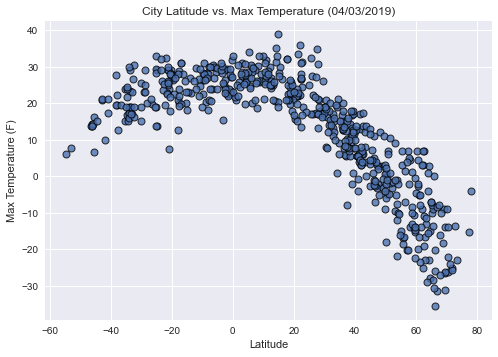

In [33]:
plt.scatter(weather_df['lat'], weather_df['max_temp'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/03/2019)")
plt.savefig("Max_temp.png")

## Latitude vs. Humidity Plot

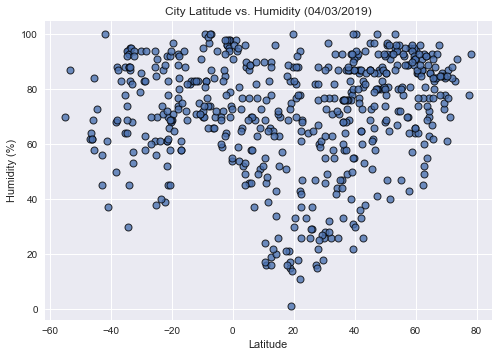

In [34]:
plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/03/2019)")
plt.savefig("Humidity.png")

## Latitude vs. Cloudiness Plot

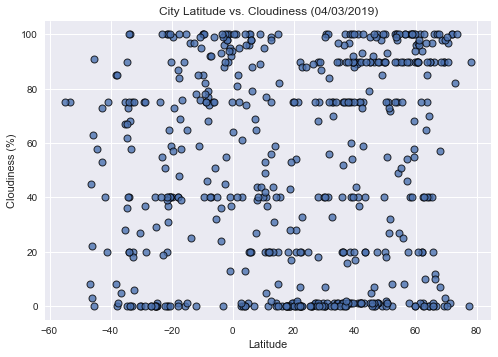

In [35]:
plt.scatter(weather_df['lat'], weather_df['cloudiness'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/03/2019)")
plt.savefig("Cloudiness.png")

## Latitude vs. Wind Speed Plot

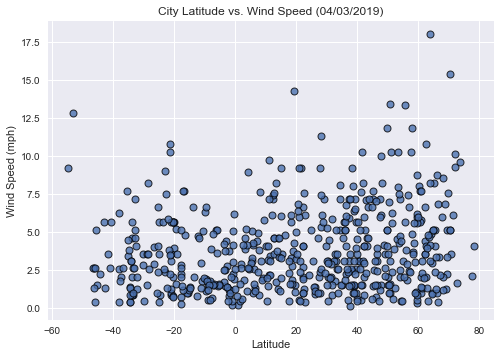

In [36]:
plt.scatter(weather_df['lat'], weather_df['windspeed'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/03/2019)")
plt.savefig("Wind_Speed.png")

## Linear Regression

In [37]:
 # Create Northern and Southern Hemisphere DataFrames
L=0
Northern = weather_df.query(f"lat >= {L}")
Southern = weather_df.query(f"lat <= {L}")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.8018175660989847


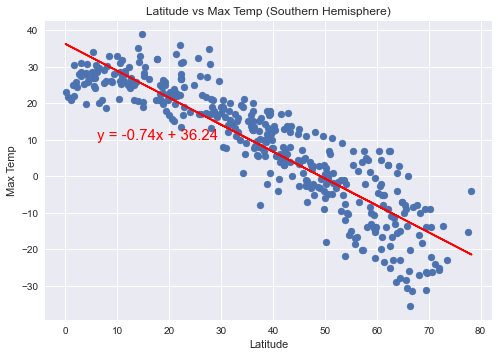

<Figure size 576x396 with 0 Axes>

In [38]:
x_values=Northern['lat']
y_values=Northern['max_temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

plt.savefig("NH_Max_Temp_Lat_Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.3191893686098038


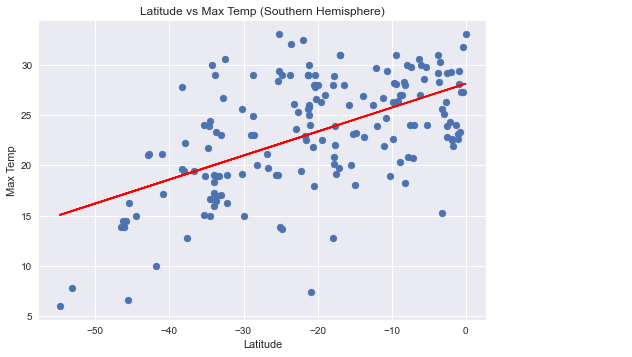

<Figure size 576x396 with 0 Axes>

In [39]:
x_values=Southern['lat']
y_values=Southern['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("SH_Max_Temp_Lat_Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.12891400577388457


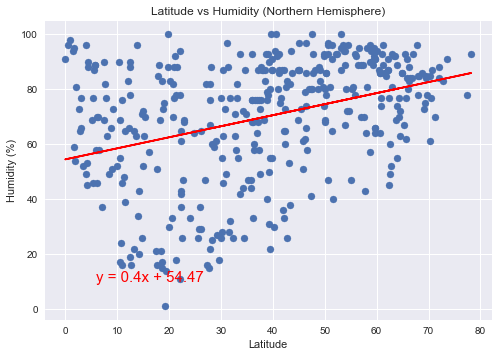

<Figure size 576x396 with 0 Axes>

In [22]:
x_values=Northern['lat']
y_values=Northern['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("NH_Humidity_Lat_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.03445061357021753


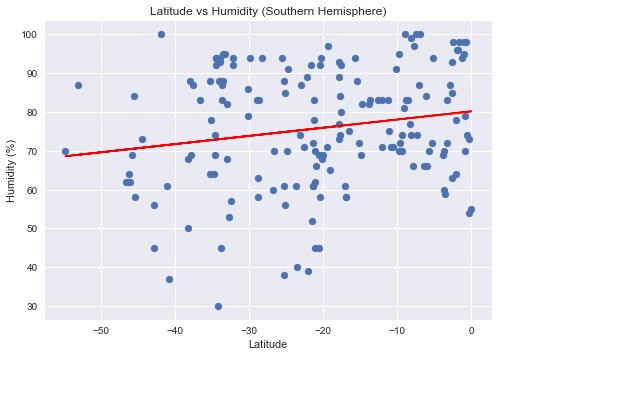

<Figure size 576x396 with 0 Axes>

In [23]:
x_values=Southern['lat']
y_values=Southern['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Southern Hemisphere)')
plt.style.use('seaborn')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("SH_Humidity_Lat_Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03320368472756577


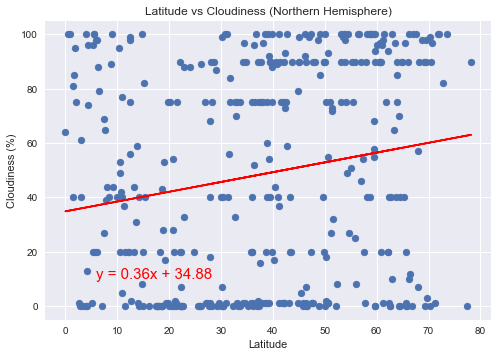

<Figure size 576x396 with 0 Axes>

In [24]:
x_values=Northern['lat']
y_values=Northern['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("NH_Cloudiness_Lat_Regression.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.12418779145308169


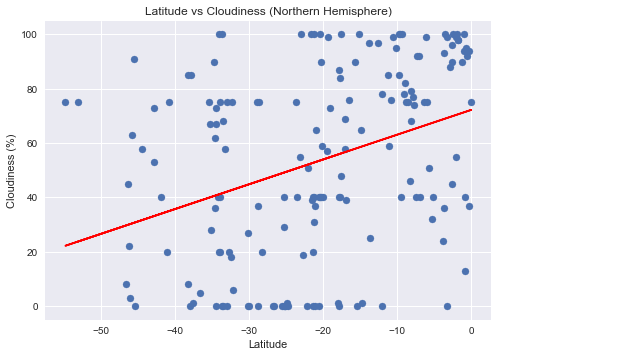

<Figure size 576x396 with 0 Axes>

In [25]:
x_values=Southern['lat']
y_values=Southern['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("SH_Cloudiness_Lat_Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.025729018502093783


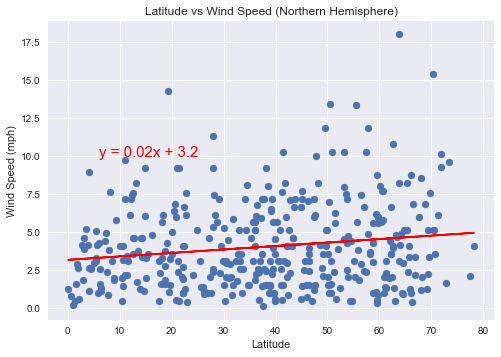

<Figure size 576x396 with 0 Axes>

In [26]:
x_values=Northern['lat']
y_values=Northern['windspeed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("NH_Wind_Speed_Lat_Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.03158791832741869


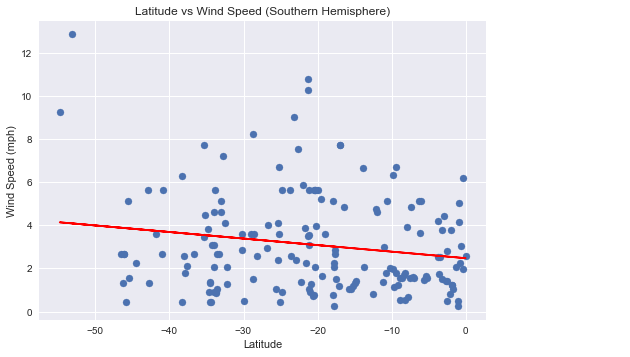

<Figure size 576x396 with 0 Axes>

In [27]:
x_values=Southern['lat']
y_values=Southern['windspeed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("SH_Wind_Speed_Lat_Regression.png")
